<a href="https://colab.research.google.com/github/Fadi7anna/Intro-to-AI/blob/main/Big_five_personality_traits_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv("/content/gdrive/MyDrive/Colab datasets/data-final.csv", sep ='\t')
df

Mounted at /content/gdrive


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


In [ ]:
df.shape

(1015341, 110)

In [ ]:
df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)

In [ ]:
print("Country col: ", df.columns.get_loc("country"))
print("IPC col: ", df.columns.get_loc("IPC"))

Country col:  107
IPC col:  106


In [ ]:
df.drop(df.columns[50:106], axis = 1, inplace = True) #dropping all cols that's not IPIP (International Personality Item Pool)
df.drop(df.columns[52:], axis = 1, inplace = True) #That's in order to keep the country and IPC columns, while dropping all cols related to the test platform (like time spent for each question, and so on)

In [ ]:
df.head() #Checking our columns

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,IPC,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,1,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,1,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,1,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,1,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,2,KE


In [ ]:
df.IPC.value_counts()

1      696845
2      105868
3       34323
4       17332
5       11135
        ...  
103       103
99         99
98         98
88         88
87         87
Name: IPC, Length: 201, dtype: int64

In [ ]:
#IPC is the number of records from the user's IP address in the dataset; For max cleanliness, it's recommended to use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions

df = df.loc[df["IPC"]==1]  
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,IPC,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,1,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,1,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,1,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,1,GB
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0,1,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015334,4.0,1.0,4.0,2.0,4.0,3.0,3.0,2.0,3.0,2.0,...,5.0,3.0,4.0,2.0,5.0,2.0,3.0,4.0,1,GB
1015335,5.0,1.0,5.0,2.0,4.0,2.0,3.0,1.0,5.0,1.0,...,4.0,2.0,3.0,2.0,5.0,3.0,4.0,4.0,1,TR
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,1,US
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,1,US


In [ ]:
df.shape

(696845, 52)

In [ ]:
print('Number of participants: ', len(df)) #Based on one single submission per user's IP, after eliminating every multi-subs from data.

Number of participants:  696845


In [ ]:
#Handling Missing Data

df.isnull().sum()

EXT1       1141
EXT2       1141
EXT3       1141
EXT4       1141
EXT5       1141
EXT6       1141
EXT7       1141
EXT8       1141
EXT9       1141
EXT10      1141
EST1       1141
EST2       1141
EST3       1141
EST4       1141
EST5       1141
EST6       1141
EST7       1141
EST8       1141
EST9       1141
EST10      1141
AGR1       1141
AGR2       1141
AGR3       1141
AGR4       1141
AGR5       1141
AGR6       1141
AGR7       1141
AGR8       1141
AGR9       1141
AGR10      1141
CSN1       1141
CSN2       1141
CSN3       1141
CSN4       1141
CSN5       1141
CSN6       1141
CSN7       1141
CSN8       1141
CSN9       1141
CSN10      1141
OPN1       1141
OPN2       1141
OPN3       1141
OPN4       1141
OPN5       1141
OPN6       1141
OPN7       1141
OPN8       1141
OPN9       1141
OPN10      1141
IPC           0
country      67
dtype: int64

In [ ]:
df.dropna(inplace = True)
df.shape
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


EXT1       0
EXT2       0
EXT3       0
EXT4       0
EXT5       0
EXT6       0
EXT7       0
EXT8       0
EXT9       0
EXT10      0
EST1       0
EST2       0
EST3       0
EST4       0
EST5       0
EST6       0
EST7       0
EST8       0
EST9       0
EST10      0
AGR1       0
AGR2       0
AGR3       0
AGR4       0
AGR5       0
AGR6       0
AGR7       0
AGR8       0
AGR9       0
AGR10      0
CSN1       0
CSN2       0
CSN3       0
CSN4       0
CSN5       0
CSN6       0
CSN7       0
CSN8       0
CSN9       0
CSN10      0
OPN1       0
OPN2       0
OPN3       0
OPN4       0
OPN5       0
OPN6       0
OPN7       0
OPN8       0
OPN9       0
OPN10      0
IPC        0
country    0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
#Handling Reverse Scoring
## All items have to be positive, that's to say, they have to be answers to a positive questionaire, and the IPIP scale contains reversed items, which means answers to a negative question, such as "I don't talk a lot"
# So we have to check whether these items are imported correctly (positively, to be a real indicators of the paramater, or not)

#1) Checking whether the reverse "EXT" items re-coded correctly

df[["EXT2","EXT4", "EXT6", "EXT8", "EXT10", "EST2", "EST4", "AGR1", "AGR3", "AGR5", "AGR7", "CSN2", "CSN4", "CSN6", "CSN8", "OPN2", "OPN4", "OPN6"]].head()

,EXT2,EXT4,EXT6,EXT8,EXT10,EST2,EST4,AGR1,AGR3,AGR5,AGR7,CSN2,CSN4,CSN6,CSN8,OPN2,OPN4,OPN6
0,1.0,2.0,1.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,2.0,1.0,1.0,1.0
1,5.0,4.0,3.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,2.0,2.0,1.0
2,3.0,4.0,2.0,3.0,5.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,2.0
3,2.0,3.0,2.0,4.0,4.0,3.0,2.0,2.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,2.0,1.0
5,3.0,2.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0


In [ ]:
df['EXT2'] = df['EXT2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['EXT4'] = df['EXT4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['EXT6'] = df['EXT6'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['EXT8'] = df['EXT8'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['EXT10'] = df['EXT10'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['EST2'] = df['EST2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['EST4'] = df['EST4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['AGR1'] = df['AGR1'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['AGR3'] = df['AGR3'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['AGR5'] = df['AGR5'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['AGR7'] = df['AGR7'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['CSN2'] = df['CSN2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['CSN4'] = df['CSN4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['CSN6'] = df['CSN6'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['CSN8'] = df['CSN8'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['OPN2'] = df['OPN2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['OPN4'] = df['OPN4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['OPN6'] = df['OPN6'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})

df[["EXT2","EXT4", "EXT6", "EXT8", "EXT10", "EST2", "EST4", "AGR1", "AGR3", "AGR5", "AGR7", "CSN2", "CSN4", "CSN6", "CSN8", "OPN2", "OPN4", "OPN6"]].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,EXT2,EXT4,EXT6,EXT8,EXT10,EST2,EST4,AGR1,AGR3,AGR5,AGR7,CSN2,CSN4,CSN6,CSN8,OPN2,OPN4,OPN6
0,5,4,5,4,5,2,4,4,4,4,4,2,4,2,4,5,5,5
1,1,2,3,1,1,3,5,5,5,5,3,4,3,5,3,4,4,5
2,3,2,4,3,1,2,4,5,5,4,5,4,4,3,4,5,5,4
3,4,3,4,2,2,3,4,4,3,4,4,2,2,4,3,4,4,5
5,3,4,4,3,2,2,4,4,5,4,4,4,5,4,3,5,5,5


In [ ]:
df[["EXT2","EXT4", "EXT6", "EXT8", "EXT10", "EST2", "EST4", "AGR1", "AGR3", "AGR5", "AGR7", "CSN2", "CSN4", "CSN6", "CSN8", "OPN2", "OPN4", "OPN6"]].isnull().sum().sum()

0

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
#After reverse scoring, we can extract new features, namely, the opposites of the big five traits.

df['INT1'] = df['EXT1'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['INT2'] = df['EXT2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['INT3'] = df['EXT3'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['INT4'] = df['EXT4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['INT5'] = df['EXT5'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['INT6'] = df['EXT6'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['INT7'] = df['EXT7'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['INT8'] = df['EXT8'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['INT9'] = df['EXT9'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['INT10'] = df['EXT10'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})


df[['EXT1','EXT2','EXT3','EXT4','EXT5', 'EXT6','EXT7', 'EXT8', 'EXT9', 'EXT10']].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10
0,4.0,5,5.0,4,5.0,5,5.0,4,4.0,5
1,3.0,1,3.0,2,3.0,3,2.0,1,1.0,1
2,2.0,3,4.0,2,3.0,4,1.0,3,2.0,1
3,2.0,4,2.0,3,4.0,4,2.0,2,1.0,2
5,3.0,3,4.0,4,4.0,4,2.0,3,3.0,2


In [ ]:
df[['INT1','INT2','INT3','INT4','INT5', 'INT6','INT7', 'INT8', 'INT9', 'INT10']].head()


,INT1,INT2,INT3,INT4,INT5,INT6,INT7,INT8,INT9,INT10
0,2,1,1,2,1,1,1,2,2,1
1,3,5,3,4,3,3,4,5,5,5
2,4,3,2,4,3,2,5,3,4,5
3,4,2,4,3,2,2,4,4,5,4
5,3,3,2,2,2,2,4,3,3,4


In [ ]:
#Extracting Stable (STL) from neurotic parameter of emotional stability (EST)

df['STL1'] = df['EST1'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['STL2'] = df['EST2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['STL3'] = df['EST3'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['STL4'] = df['EST4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['STL5'] = df['EST5'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['STL6'] = df['EST6'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['STL7'] = df['EST7'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['STL8'] = df['EST8'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['STL9'] = df['EST9'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['STL10'] = df['EST10'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})

df[['EST1','EST2','EST3','EST4','EST5', 'EST6','EST7', 'EST8', 'EST9', 'EST10']].head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10
0,1.0,2,4.0,4,2.0,2.0,2.0,2.0,3.0,2.0
1,2.0,3,4.0,5,3.0,1.0,2.0,1.0,3.0,1.0
2,4.0,2,4.0,4,2.0,2.0,2.0,2.0,1.0,3.0
3,3.0,3,3.0,4,3.0,2.0,2.0,2.0,4.0,3.0
5,3.0,2,3.0,4,2.0,1.0,2.0,1.0,2.0,2.0


In [ ]:
df[['STL1','STL2','STL3','STL4','STL5', 'STL6','STL7', 'STL8', 'STL9', 'STL10']].head()


,STL1,STL2,STL3,STL4,STL5,STL6,STL7,STL8,STL9,STL10
0,5,4,2,2,4,4,4,4,3,4
1,4,3,2,1,3,5,4,5,3,5
2,2,4,2,2,4,4,4,4,5,3
3,3,3,3,2,3,4,4,4,2,3
5,3,4,3,2,4,5,4,5,4,4


In [ ]:
#Extracting the opposite parameter of agreeability (AGR), the hostility parameter (HST)

df['HST1'] = df['AGR1'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['HST2'] = df['AGR2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['HST3'] = df['AGR3'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['HST4'] = df['AGR4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['HST5'] = df['AGR5'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['HST6'] = df['AGR6'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['HST7'] = df['AGR7'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['HST8'] = df['AGR8'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['HST9'] = df['AGR9'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['HST10'] = df['AGR10'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})

df[['AGR1','AGR2','AGR3','AGR4','AGR5', 'AGR6','AGR7', 'AGR8', 'AGR9', 'AGR10']].head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10
0,4,5.0,4,4.0,4,3.0,4,4.0,3.0,4.0
1,5,4.0,5,5.0,5,5.0,3,4.0,5.0,3.0
2,5,4.0,5,4.0,4,4.0,5,4.0,4.0,3.0
3,4,4.0,3,4.0,4,4.0,4,4.0,3.0,4.0
5,4,3.0,5,4.0,4,3.0,4,3.0,4.0,4.0


In [ ]:
df[['HST1','HST2','HST3','HST4','HST5', 'HST6','HST7', 'HST8', 'HST9', 'HST10']].head()


,HST1,HST2,HST3,HST4,HST5,HST6,HST7,HST8,HST9,HST10
0,2,1,2,2,2,3,2,2,3,2
1,1,2,1,1,1,1,3,2,1,3
2,1,2,1,2,2,2,1,2,2,3
3,2,2,3,2,2,2,2,2,3,2
5,2,3,1,2,2,3,2,3,2,2


In [ ]:
#Spontanious (SPN) from consciouteiusness (CSN)

df['SPN1'] = df['CSN1'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['SPN2'] = df['CSN2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['SPN3'] = df['CSN3'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['SPN4'] = df['CSN4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['SPN5'] = df['CSN5'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['SPN6'] = df['CSN6'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['SPN7'] = df['CSN7'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['SPN8'] = df['CSN8'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['SPN9'] = df['CSN9'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['SPN10'] = df['CSN10'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})

df[['CSN1','CSN2','CSN3','CSN4','CSN5', 'CSN6','CSN7', 'CSN8', 'CSN9', 'CSN10']].head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10
0,3.0,2,3.0,4,2.0,2,4.0,4,4.0,4.0
1,3.0,4,5.0,3,3.0,5,3.0,3,5.0,3.0
2,4.0,4,2.0,4,3.0,3,4.0,4,4.0,2.0
3,2.0,2,4.0,2,1.0,4,2.0,3,1.0,4.0
5,3.0,4,4.0,5,3.0,4,4.0,3,4.0,3.0


In [ ]:
df[['SPN1','SPN2','SPN3','SPN4','SPN5', 'SPN6','SPN7', 'SPN8', 'SPN9', 'SPN10']].head()


,SPN1,SPN2,SPN3,SPN4,SPN5,SPN6,SPN7,SPN8,SPN9,SPN10
0,3,4,3,2,4,4,2,2,2,2
1,3,2,1,3,3,1,3,3,1,3
2,2,2,4,2,3,3,2,2,2,4
3,4,4,2,4,5,2,4,3,5,2
5,3,2,2,1,3,2,2,3,2,3


In [ ]:
#closeness from openness

df['CLS1'] = df['OPN1'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['CLS2'] = df['OPN2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['CLS3'] = df['OPN3'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['CLS4'] = df['OPN4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['CLS5'] = df['OPN5'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['CLS6'] = df['OPN6'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['CLS7'] = df['OPN7'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['CLS8'] = df['OPN8'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['CLS9'] = df['OPN9'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
df['CLS10'] = df['OPN10'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})

df[['OPN1','OPN2','OPN3','OPN4','OPN5', 'OPN6','OPN7', 'OPN8', 'OPN9', 'OPN10']].head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,5.0,5,4.0,5,4.0,5,5.0,3.0,4.0,5.0
1,1.0,4,4.0,4,3.0,5,4.0,2.0,5.0,3.0
2,5.0,5,2.0,5,4.0,4,5.0,3.0,4.0,4.0
3,4.0,4,5.0,4,3.0,5,4.0,4.0,3.0,3.0
5,5.0,5,5.0,5,3.0,5,5.0,4.0,5.0,2.0


In [ ]:
df[['CLS1','CLS2','CLS3','CLS4','CLS5', 'CLS6','CLS7', 'CLS8', 'CLS9', 'CLS10']].head()


,CLS1,CLS2,CLS3,CLS4,CLS5,CLS6,CLS7,CLS8,CLS9,CLS10
0,1,1,2,1,2,1,1,3,2,1
1,5,2,2,2,3,1,2,4,1,3
2,1,1,4,1,2,2,1,3,2,2
3,2,2,1,2,3,1,2,2,3,3
5,1,1,1,1,3,1,1,2,1,4


In [ ]:
#Checking the new columns

list(df.columns)

['EXT1',
 'EXT2',
 'EXT3',
 'EXT4',
 'EXT5',
 'EXT6',
 'EXT7',
 'EXT8',
 'EXT9',
 'EXT10',
 'EST1',
 'EST2',
 'EST3',
 'EST4',
 'EST5',
 'EST6',
 'EST7',
 'EST8',
 'EST9',
 'EST10',
 'AGR1',
 'AGR2',
 'AGR3',
 'AGR4',
 'AGR5',
 'AGR6',
 'AGR7',
 'AGR8',
 'AGR9',
 'AGR10',
 'CSN1',
 'CSN2',
 'CSN3',
 'CSN4',
 'CSN5',
 'CSN6',
 'CSN7',
 'CSN8',
 'CSN9',
 'CSN10',
 'OPN1',
 'OPN2',
 'OPN3',
 'OPN4',
 'OPN5',
 'OPN6',
 'OPN7',
 'OPN8',
 'OPN9',
 'OPN10',
 'IPC',
 'country',
 'INT1',
 'INT2',
 'INT3',
 'INT4',
 'INT5',
 'INT6',
 'INT7',
 'INT8',
 'INT9',
 'INT10',
 'STL1',
 'STL2',
 'STL3',
 'STL4',
 'STL5',
 'STL6',
 'STL7',
 'STL8',
 'STL9',
 'STL10',
 'HST1',
 'HST2',
 'HST3',
 'HST4',
 'HST5',
 'HST6',
 'HST7',
 'HST8',
 'HST9',
 'HST10',
 'SPN1',
 'SPN2',
 'SPN3',
 'SPN4',
 'SPN5',
 'SPN6',
 'SPN7',
 'SPN8',
 'SPN9',
 'SPN10',
 'CLS1',
 'CLS2',
 'CLS3',
 'CLS4',
 'CLS5',
 'CLS6',
 'CLS7',
 'CLS8',
 'CLS9',
 'CLS10']

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
#total scores for every group of questions divided by 10

df['Extroversion_score']= df[list(df.filter(regex='EXT'))].sum(axis=1)/10
df['Neurosis_score']= df[list(df.filter(regex='EST'))].sum(axis=1)/10
df['Agreeability_score']= df[list(df.filter(regex='AGR'))].sum(axis=1)/10
df['Conscientiousness_score']= df[list(df.filter(regex='CSN'))].sum(axis=1)/10
df['Openness_score']= df[list(df.filter(regex='OPN'))].sum(axis=1)/10
df['Introversion_score']= df[list(df.filter(regex='INT'))].sum(axis=1)/10
df['Stability_score']= df[list(df.filter(regex='STL'))].sum(axis=1)/10
df['Hostility_score']= df[list(df.filter(regex='HST'))].sum(axis=1)/10
df['Spontaneousness_score']= df[list(df.filter(regex='SPN'))].sum(axis=1)/10
df['Closness_score']= df[list(df.filter(regex='CLS'))].sum(axis=1)/10

df.head()

#summing the total score for every group of questions divided by 10

# total_scores = pd.DataFrame()
# total_scores['Extroversion_score']= df[list(df.filter(regex='EXT'))].sum(axis=1)/10
# total_scores['Neurosis_score']= df[list(df.filter(regex='EST'))].sum(axis=1)/10
# total_scores['Agreeability_score']= df[list(df.filter(regex='AGR'))].sum(axis=1)/10
# total_scores['Conscientiousness_score']= df[list(df.filter(regex='CSN'))].sum(axis=1)/10
# total_scores['Openness_score']= df[list(df.filter(regex='OPN'))].sum(axis=1)/10
# total_scores['Introversion_score']= df[list(df.filter(regex='INT'))].sum(axis=1)/10
# total_scores['Stability_score']= df[list(df.filter(regex='STL'))].sum(axis=1)/10
# total_scores['Hostility_score']= df[list(df.filter(regex='HST'))].sum(axis=1)/10
# total_scores['Spontaneousness_score']= df[list(df.filter(regex='SPN'))].sum(axis=1)/10
# total_scores['Closness_score']= df[list(df.filter(regex='CLS'))].sum(axis=1)/10

# total_scores.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,Extroversion_score,Neurosis_score,Agreeability_score,Conscientiousness_score,Openness_score,Introversion_score,Stability_score,Hostility_score,Spontaneousness_score,Closness_score
0,4.0,5,5.0,4,5.0,5,5.0,4,4.0,5,...,4.6,2.4,3.9,3.2,4.5,1.4,3.6,2.1,2.8,1.5
1,3.0,1,3.0,2,3.0,3,2.0,1,1.0,1,...,2.0,2.5,4.4,3.7,3.5,4.0,3.5,1.6,2.3,2.5
2,2.0,3,4.0,2,3.0,4,1.0,3,2.0,1,...,2.5,2.6,4.2,3.4,4.1,3.5,3.4,1.8,2.6,1.9
3,2.0,4,2.0,3,4.0,4,2.0,2,1.0,2,...,2.6,2.9,3.8,2.5,3.9,3.4,3.1,2.2,3.5,2.1
5,3.0,3,4.0,4,4.0,4,2.0,3,3.0,2,...,3.2,2.2,3.8,3.7,4.4,2.8,3.8,2.2,2.3,1.6


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
list(df.columns)

['EXT1',
 'EXT2',
 'EXT3',
 'EXT4',
 'EXT5',
 'EXT6',
 'EXT7',
 'EXT8',
 'EXT9',
 'EXT10',
 'EST1',
 'EST2',
 'EST3',
 'EST4',
 'EST5',
 'EST6',
 'EST7',
 'EST8',
 'EST9',
 'EST10',
 'AGR1',
 'AGR2',
 'AGR3',
 'AGR4',
 'AGR5',
 'AGR6',
 'AGR7',
 'AGR8',
 'AGR9',
 'AGR10',
 'CSN1',
 'CSN2',
 'CSN3',
 'CSN4',
 'CSN5',
 'CSN6',
 'CSN7',
 'CSN8',
 'CSN9',
 'CSN10',
 'OPN1',
 'OPN2',
 'OPN3',
 'OPN4',
 'OPN5',
 'OPN6',
 'OPN7',
 'OPN8',
 'OPN9',
 'OPN10',
 'IPC',
 'country',
 'INT1',
 'INT2',
 'INT3',
 'INT4',
 'INT5',
 'INT6',
 'INT7',
 'INT8',
 'INT9',
 'INT10',
 'STL1',
 'STL2',
 'STL3',
 'STL4',
 'STL5',
 'STL6',
 'STL7',
 'STL8',
 'STL9',
 'STL10',
 'HST1',
 'HST2',
 'HST3',
 'HST4',
 'HST5',
 'HST6',
 'HST7',
 'HST8',
 'HST9',
 'HST10',
 'SPN1',
 'SPN2',
 'SPN3',
 'SPN4',
 'SPN5',
 'SPN6',
 'SPN7',
 'SPN8',
 'SPN9',
 'SPN10',
 'CLS1',
 'CLS2',
 'CLS3',
 'CLS4',
 'CLS5',
 'CLS6',
 'CLS7',
 'CLS8',
 'CLS9',
 'CLS10',
 'Extroversion_score',
 'Neurosis_score',
 'Agreeability_score',
 'Con

In [ ]:
df_parameters = df[['Extroversion_score', 'Neurosis_score', 'Agreeability_score', 'Conscientiousness_score', 'Openness_score', 'Introversion_score', 'Stability_score', 'Hostility_score', 'Spontaneousness_score', 'Closness_score']]



df_parameters

,Extroversion_score,Neurosis_score,Agreeability_score,Conscientiousness_score,Openness_score,Introversion_score,Stability_score,Hostility_score,Spontaneousness_score,Closness_score
0,4.6,2.4,3.9,3.2,4.5,1.4,3.6,2.1,2.8,1.5
1,2.0,2.5,4.4,3.7,3.5,4.0,3.5,1.6,2.3,2.5
2,2.5,2.6,4.2,3.4,4.1,3.5,3.4,1.8,2.6,1.9
3,2.6,2.9,3.8,2.5,3.9,3.4,3.1,2.2,3.5,2.1
5,3.2,2.2,3.8,3.7,4.4,2.8,3.8,2.2,2.3,1.6
...,...,...,...,...,...,...,...,...,...,...
1015334,3.8,2.8,4.0,3.4,3.6,2.2,3.2,2.0,2.6,2.4
1015335,4.5,4.6,3.9,2.7,4.0,1.5,1.4,2.1,3.3,2.0
1015337,3.2,4.4,3.9,2.8,4.5,2.8,1.6,2.1,3.2,1.5
1015339,2.2,3.5,3.7,3.8,4.1,3.8,2.5,2.3,2.2,1.9


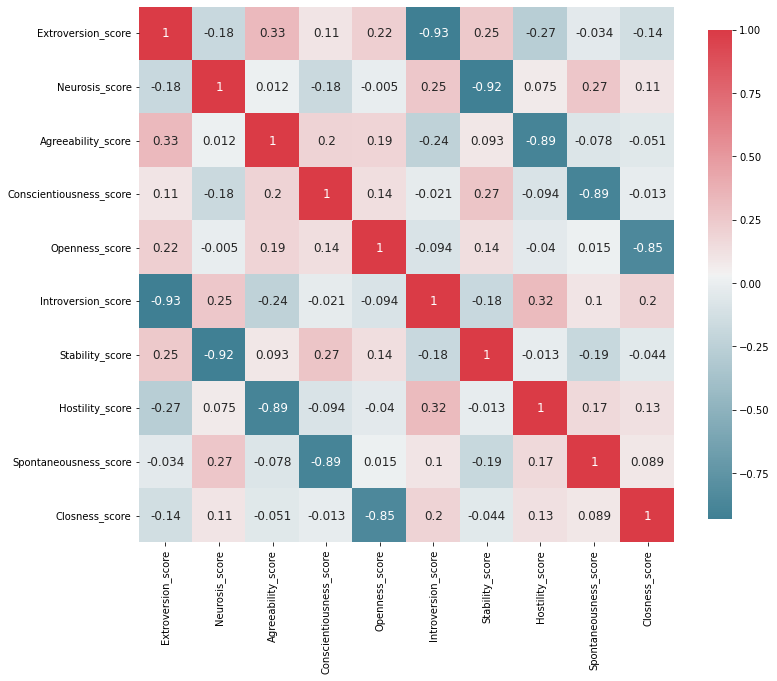

In [ ]:
# The correlation of parameters show that with increased EXT_totalscore (i.e, the Extroversion factor) there's a decreasing score of neurosis (emotional_stability parameter EST), and increasing in the agreeability and openness scores
# And vice versa, the increasing score of Introversion (INT) is accompanied by a increasing score in Neurosis, Closeness, and Hostility parameters

import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_map(df):
    corr = df_parameters.corr()
s , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(df_parameters.corr(), cmap = cmap,square=True,cbar_kws={ 'shrink' : .9 },ax=ax,annot = True,annot_kws = { 'fontsize' : 12 })


In [ ]:
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}



In [ ]:
# Group Names and Columns

EXT = [column for column in df if column.startswith('EXT')]
EST = [column for column in df if column.startswith('EST')]
AGR = [column for column in df if column.startswith('AGR')]
CSN = [column for column in df if column.startswith('CSN')]
OPN = [column for column in df if column.startswith('OPN')]

INT = [column for column in df if column.startswith('INT')]
STL = [column for column in df if column.startswith('STL')]
HST = [column for column in df if column.startswith('HST')]
SPN = [column for column in df if column.startswith('SPN')]
CLS = [column for column in df if column.startswith('CLS')]


In [ ]:
# Defining a function to visualize the questions and answers distribution

def _visualization_(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10, 5, i)
        plt.hist(df[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


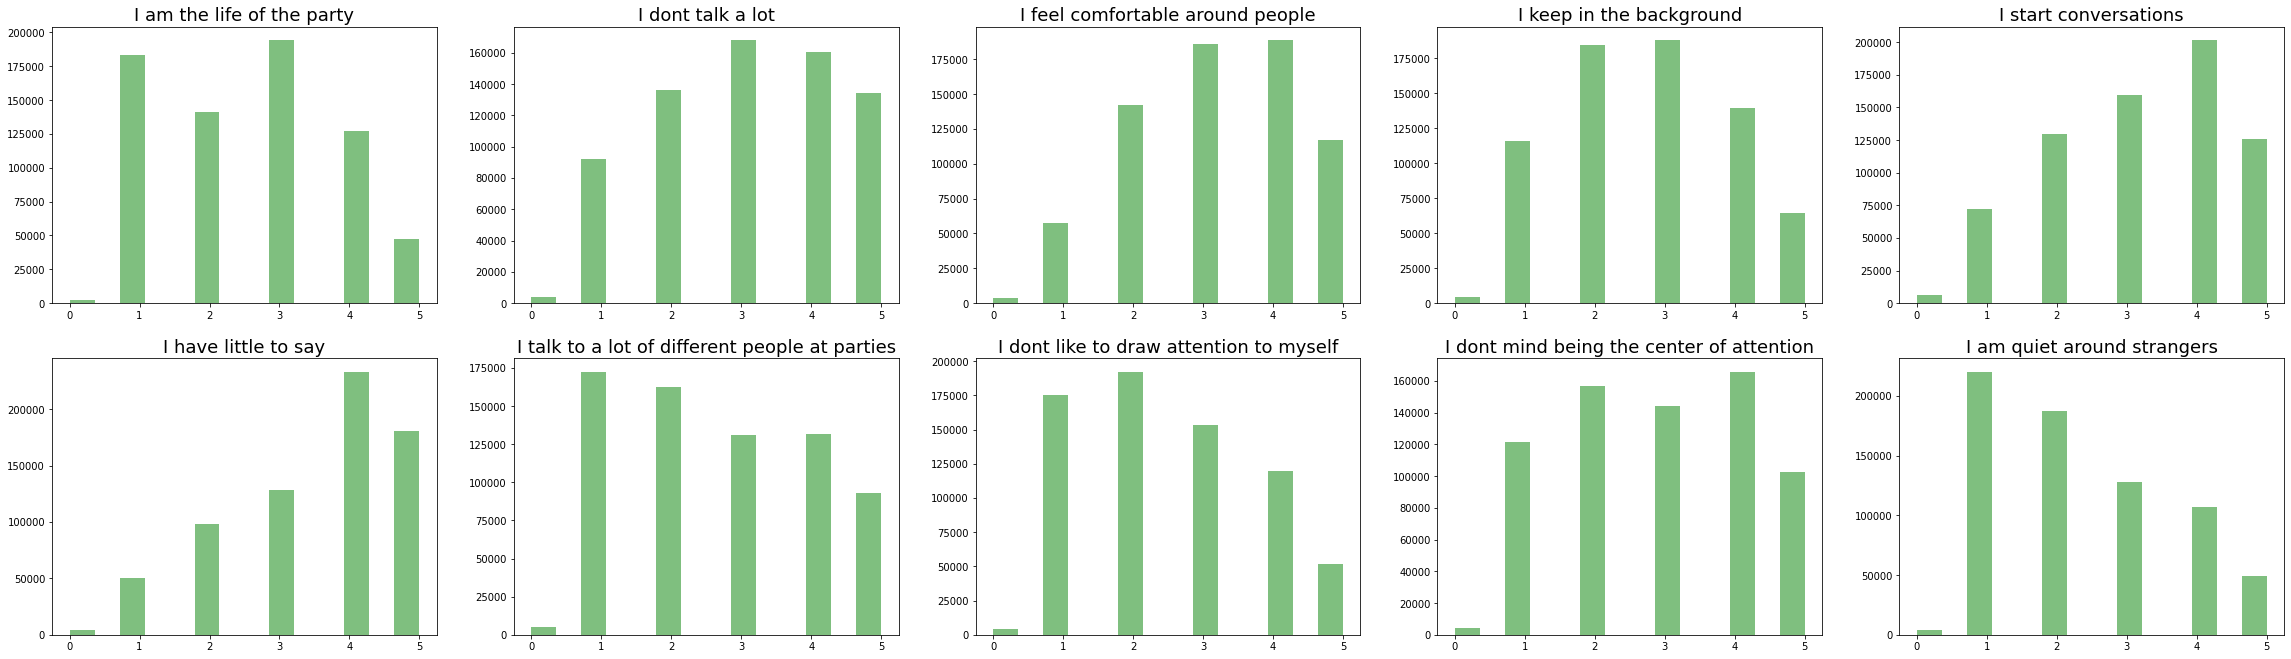

In [ ]:
print('Q&As Related to Extroversion Personality')

_visualization_(EXT, ext_questions, 'green')

Q&As Related to Neurotic Personality


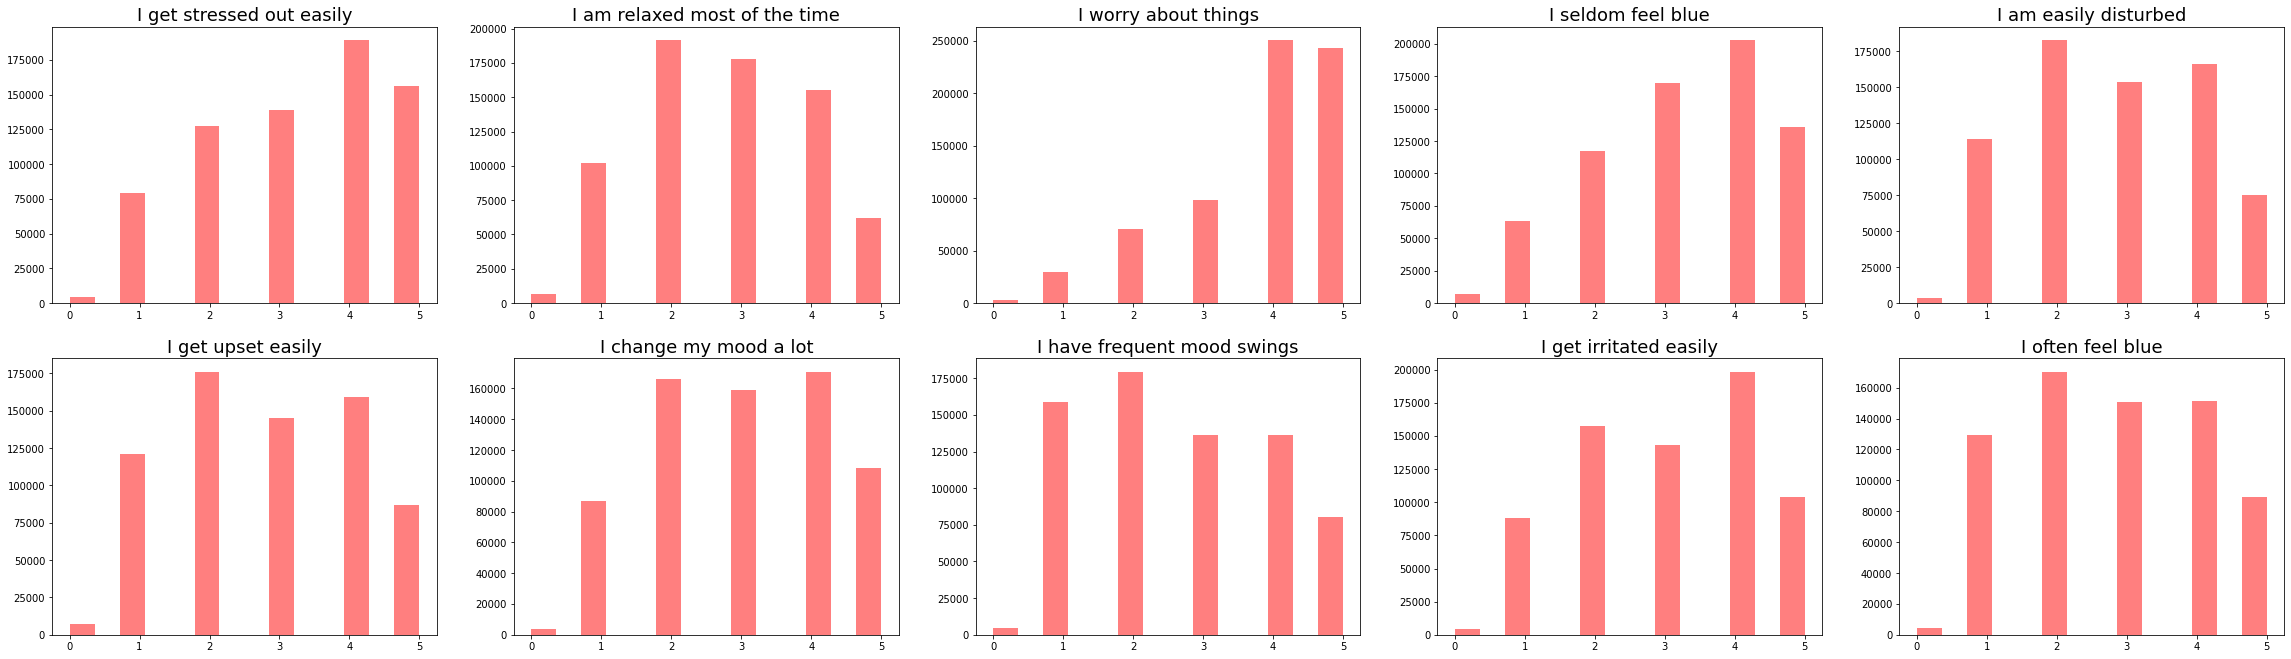

In [ ]:
print('Q&As Related to Neurotic Personality')

_visualization_(EST, est_questions, 'red')

Q&As Related to Agreeable Personality


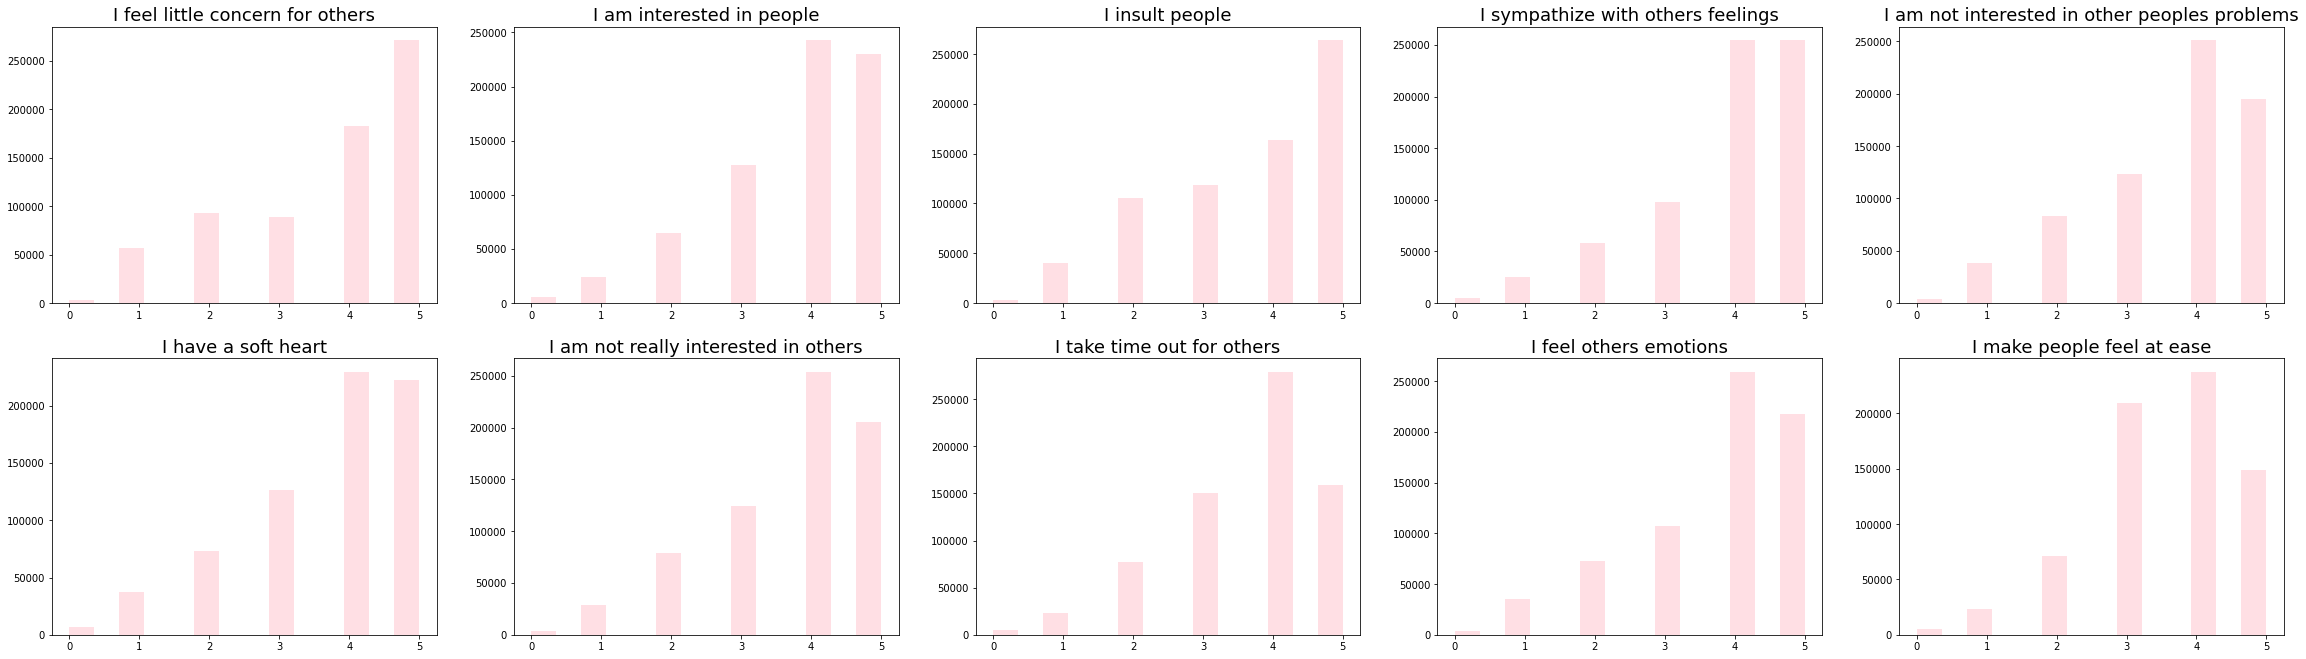

In [ ]:
print('Q&As Related to Agreeable Personality')

_visualization_(AGR, agr_questions, 'pink')

Q&As Related to Conscientious Personality


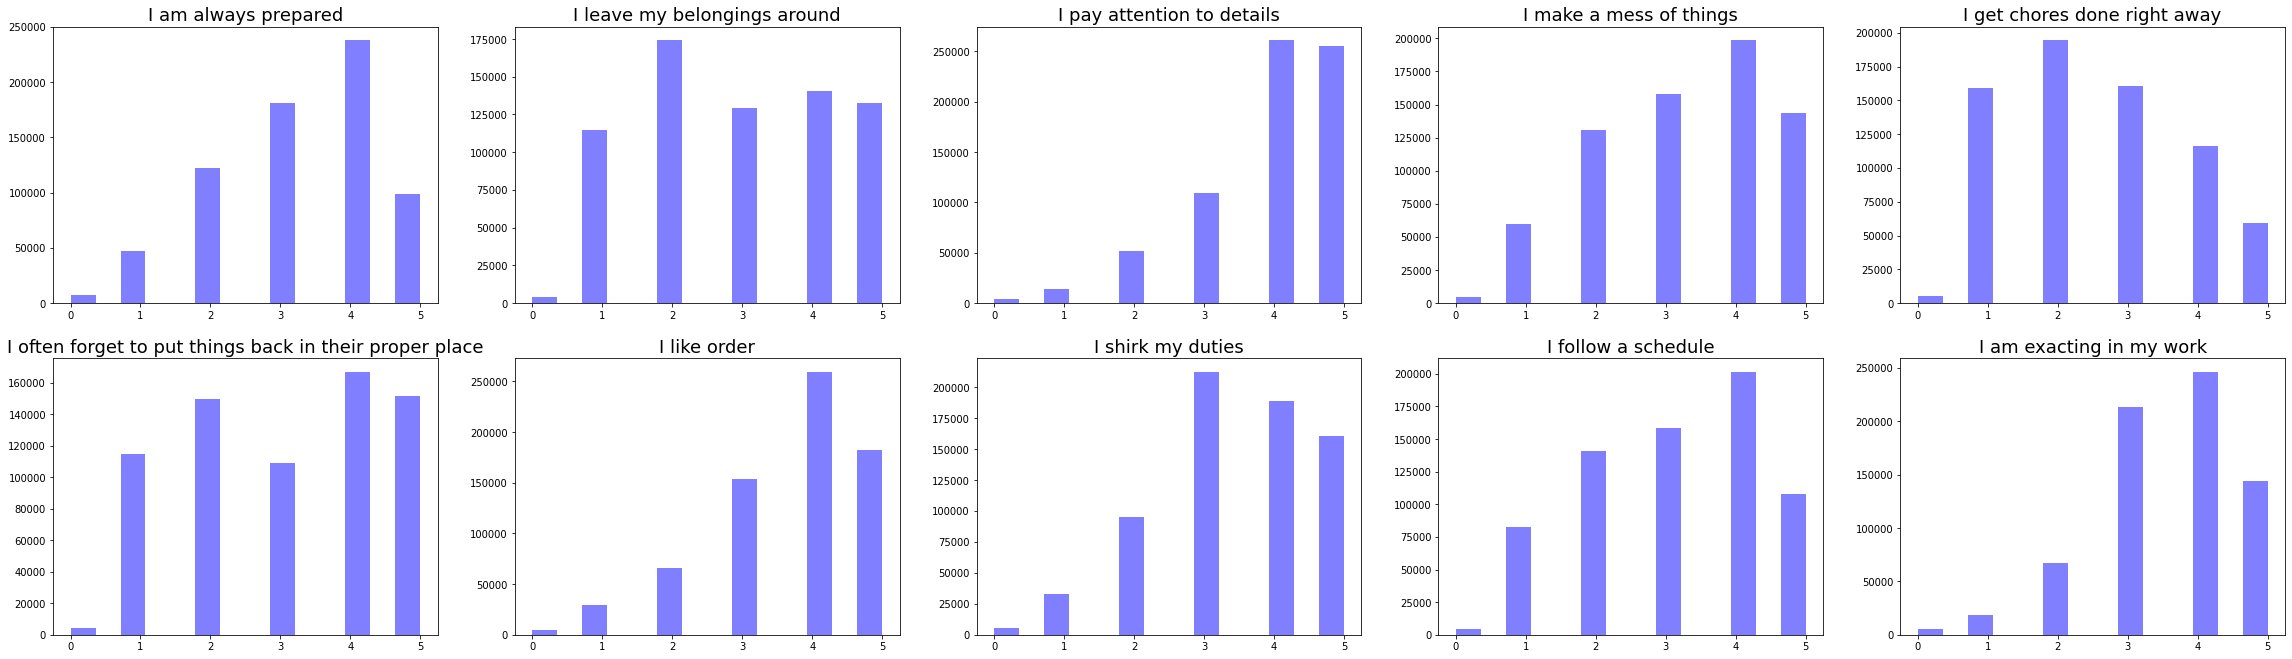

In [ ]:
print('Q&As Related to Conscientious Personality')

_visualization_(CSN, csn_questions, 'blue')

Q&As Related to Open Personality


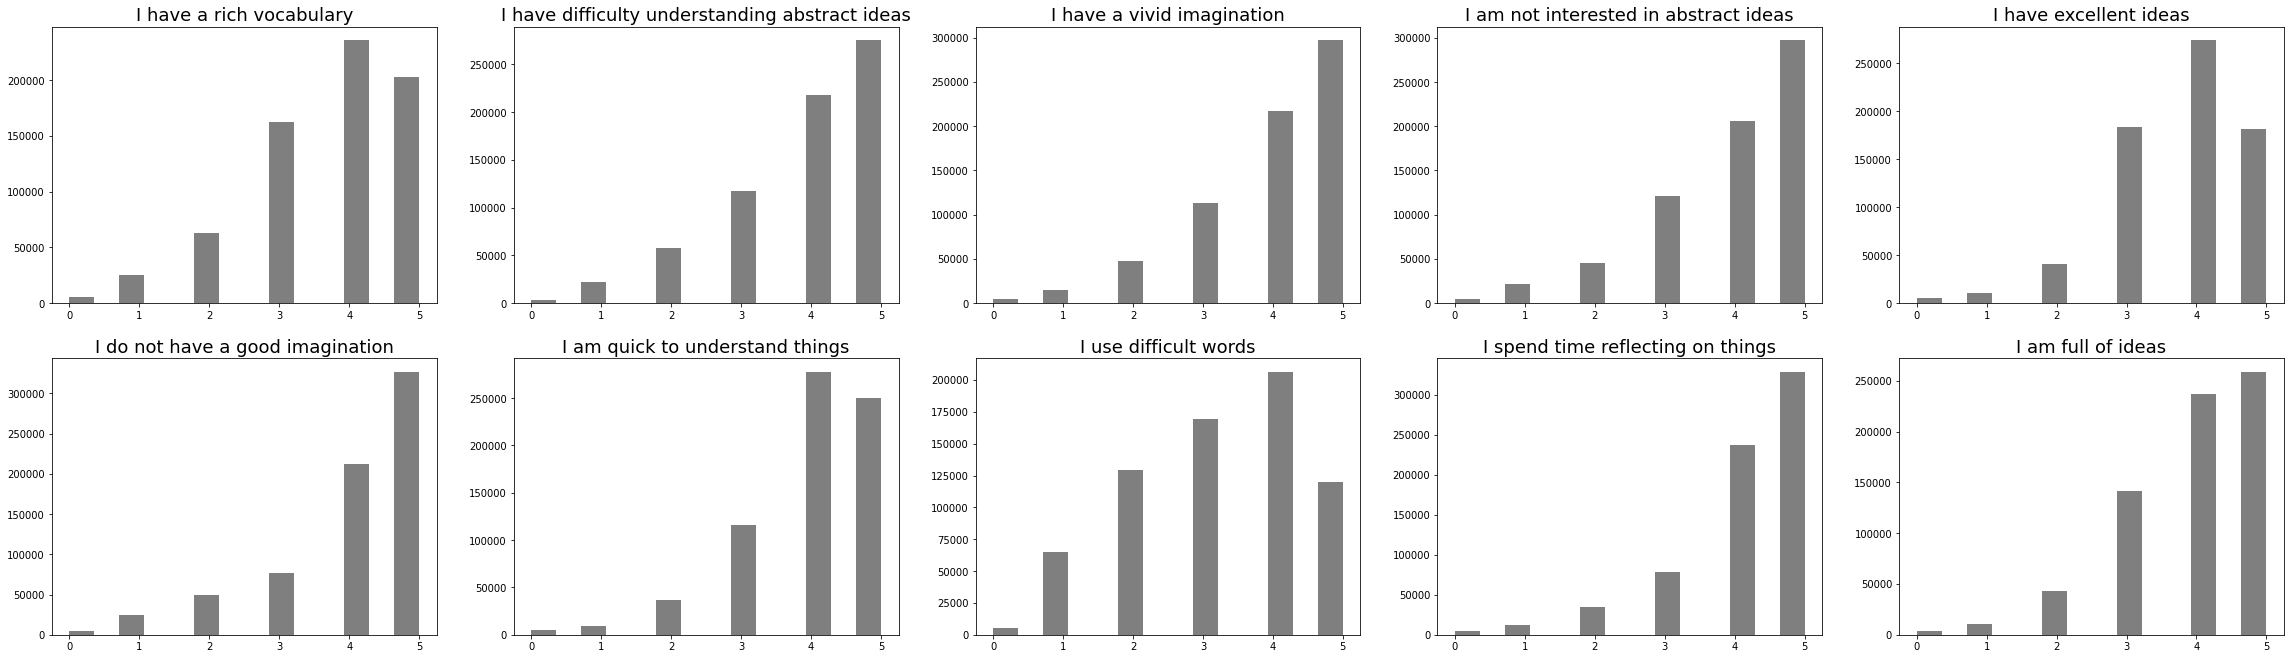

In [ ]:
print('Q&As Related to Open Personality')

_visualization_(OPN, opn_questions, 'black')

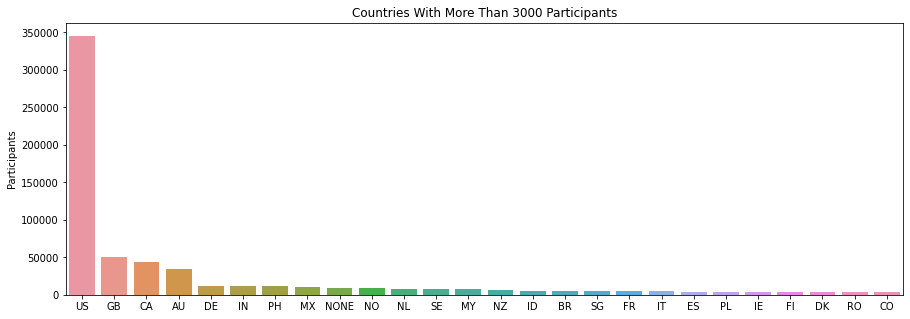

In [ ]:
##Participants' nationality distriution

countries = pd.DataFrame(df['country'].value_counts())
countries_3000 = countries[countries['country'] >= 3000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_3000, x=countries_3000.index, y='country')
plt.title('Countries With More Than 3000 Participants')
plt.ylabel('Participants');

In [ ]:
countries = df['country']

In [ ]:
countries

0          GB
1          MY
2          GB
3          GB
5          SE
           ..
1015334    GB
1015335    TR
1015337    US
1015339    US
1015340    US
Name: country, Length: 695637, dtype: object

In [ ]:
#excluding the country columns for modeling

data = df.loc[:, df.columns != 'country']
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,Extroversion_score,Neurosis_score,Agreeability_score,Conscientiousness_score,Openness_score,Introversion_score,Stability_score,Hostility_score,Spontaneousness_score,Closness_score
0,4.0,5,5.0,4,5.0,5,5.0,4,4.0,5,...,4.6,2.4,3.9,3.2,4.5,1.4,3.6,2.1,2.8,1.5
1,3.0,1,3.0,2,3.0,3,2.0,1,1.0,1,...,2.0,2.5,4.4,3.7,3.5,4.0,3.5,1.6,2.3,2.5
2,2.0,3,4.0,2,3.0,4,1.0,3,2.0,1,...,2.5,2.6,4.2,3.4,4.1,3.5,3.4,1.8,2.6,1.9
3,2.0,4,2.0,3,4.0,4,2.0,2,1.0,2,...,2.6,2.9,3.8,2.5,3.9,3.4,3.1,2.2,3.5,2.1
5,3.0,3,4.0,4,4.0,4,2.0,3,3.0,2,...,3.2,2.2,3.8,3.7,4.4,2.8,3.8,2.2,2.3,1.6


In [ ]:
data.shape

(695637, 111)

In [ ]:
df.shape


(695637, 112)

In [ ]:
data_columns = list(data.columns)
data_columns

['EXT1',
 'EXT2',
 'EXT3',
 'EXT4',
 'EXT5',
 'EXT6',
 'EXT7',
 'EXT8',
 'EXT9',
 'EXT10',
 'EST1',
 'EST2',
 'EST3',
 'EST4',
 'EST5',
 'EST6',
 'EST7',
 'EST8',
 'EST9',
 'EST10',
 'AGR1',
 'AGR2',
 'AGR3',
 'AGR4',
 'AGR5',
 'AGR6',
 'AGR7',
 'AGR8',
 'AGR9',
 'AGR10',
 'CSN1',
 'CSN2',
 'CSN3',
 'CSN4',
 'CSN5',
 'CSN6',
 'CSN7',
 'CSN8',
 'CSN9',
 'CSN10',
 'OPN1',
 'OPN2',
 'OPN3',
 'OPN4',
 'OPN5',
 'OPN6',
 'OPN7',
 'OPN8',
 'OPN9',
 'OPN10',
 'IPC',
 'INT1',
 'INT2',
 'INT3',
 'INT4',
 'INT5',
 'INT6',
 'INT7',
 'INT8',
 'INT9',
 'INT10',
 'STL1',
 'STL2',
 'STL3',
 'STL4',
 'STL5',
 'STL6',
 'STL7',
 'STL8',
 'STL9',
 'STL10',
 'HST1',
 'HST2',
 'HST3',
 'HST4',
 'HST5',
 'HST6',
 'HST7',
 'HST8',
 'HST9',
 'HST10',
 'SPN1',
 'SPN2',
 'SPN3',
 'SPN4',
 'SPN5',
 'SPN6',
 'SPN7',
 'SPN8',
 'SPN9',
 'SPN10',
 'CLS1',
 'CLS2',
 'CLS3',
 'CLS4',
 'CLS5',
 'CLS6',
 'CLS7',
 'CLS8',
 'CLS9',
 'CLS10',
 'Extroversion_score',
 'Neurosis_score',
 'Agreeability_score',
 'Conscientiousne

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0,1))
# X = scaler.fit_transform(data)
# X = pd.DataFrame(data, columns= data_columns)
# X_sample = data[:7000]

In [ ]:
data_sample = data[:5000]

In [ ]:
# Calculating the squared distance of each point from its closest cluster.
from sklearn.cluster import KMeans


Sum_of_squared_distances= []
K= range(1,11)
for k in K:
    km=KMeans(n_clusters=k)
    km= km.fit(data_sample)
    Sum_of_squared_distances.append(km.inertia_)

print(Sum_of_squared_distances)

[749753.1546360002, 667633.9408518455, 632090.5042735436, 608478.1233843232, 591012.4869308104, 580304.7664436379, 570647.2035261688, 560723.490224804, 552792.0353951547, 544727.1145045783]


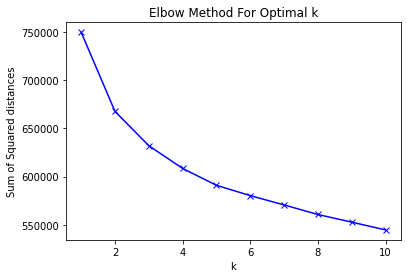

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared distances')
plt.title('Elbow Method For Optimal k')

plt.show()

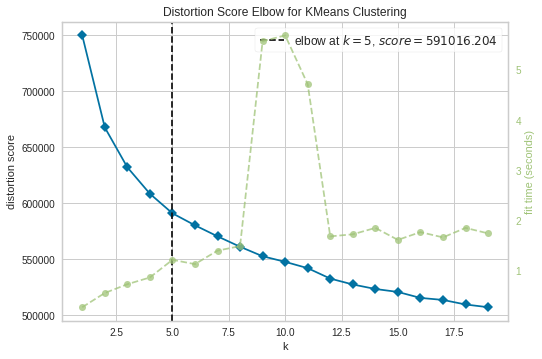

In [ ]:
# Visualizing the elbow

from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(data_sample)
visualizer.poof()

In [ ]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,Extroversion_score,Neurosis_score,Agreeability_score,Conscientiousness_score,Openness_score,Introversion_score,Stability_score,Hostility_score,Spontaneousness_score,Closness_score
0,4.0,5,5.0,4,5.0,5,5.0,4,4.0,5,...,4.6,2.4,3.9,3.2,4.5,1.4,3.6,2.1,2.8,1.5
1,3.0,1,3.0,2,3.0,3,2.0,1,1.0,1,...,2.0,2.5,4.4,3.7,3.5,4.0,3.5,1.6,2.3,2.5
2,2.0,3,4.0,2,3.0,4,1.0,3,2.0,1,...,2.5,2.6,4.2,3.4,4.1,3.5,3.4,1.8,2.6,1.9
3,2.0,4,2.0,3,4.0,4,2.0,2,1.0,2,...,2.6,2.9,3.8,2.5,3.9,3.4,3.1,2.2,3.5,2.1
5,3.0,3,4.0,4,4.0,4,2.0,3,3.0,2,...,3.2,2.2,3.8,3.7,4.4,2.8,3.8,2.2,2.3,1.6


In [ ]:
#Building the K-MEANS model

from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans

kmeans =KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmean_model = kmeans.fit(data)


kmean_labels = kmean_model.labels_


In [ ]:
kmean_model.inertia_

83691850.02851416

In [ ]:
correct_lables = sum(y == kmean_labels)

NameError: ignored

In [ ]:

# #predicting clusters. 

# ykmeans= kmeans.fit_predict(X)
# ykmeans

In [ ]:
# Predicting the Clusters
# pd.options.display.max_columns = 10
kmean_labels = kmean_model.labels_

data['Clusters'] = kmean_labels
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,Neurosis_score,Agreeability_score,Conscientiousness_score,Openness_score,Introversion_score,Stability_score,Hostility_score,Spontaneousness_score,Closness_score,Clusters
0,4.0,5,5.0,4,5.0,5,5.0,4,4.0,5,...,2.4,3.9,3.2,4.5,1.4,3.6,2.1,2.8,1.5,0
1,3.0,1,3.0,2,3.0,3,2.0,1,1.0,1,...,2.5,4.4,3.7,3.5,4.0,3.5,1.6,2.3,2.5,1
2,2.0,3,4.0,2,3.0,4,1.0,3,2.0,1,...,2.6,4.2,3.4,4.1,3.5,3.4,1.8,2.6,1.9,1
3,2.0,4,2.0,3,4.0,4,2.0,2,1.0,2,...,2.9,3.8,2.5,3.9,3.4,3.1,2.2,3.5,2.1,4
5,3.0,3,4.0,4,4.0,4,2.0,3,3.0,2,...,2.2,3.8,3.7,4.4,2.8,3.8,2.2,2.3,1.6,0


In [ ]:
# _labels=pd.DataFrame(kmeans.labels_)
# _labels


In [ ]:
# kmeans.predict(X)

# print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

In [ ]:
kmean_labels




array([0, 1, 1, ..., 3, 1, 3], dtype=int32)

In [ ]:
#Number of participants in every single cluster

data.Clusters.value_counts()

3    153107
1    144381
0    143403
2    138072
4    116674
Name: Clusters, dtype: int64

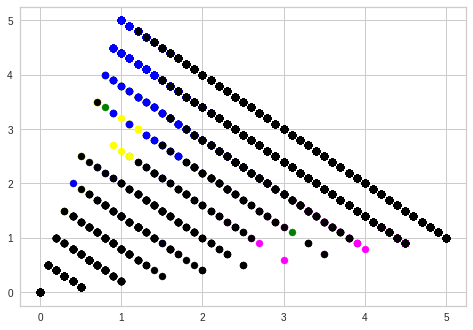

In [ ]:
plt.scatter(data["Stability_score"][kmean_labels== 0], data["Neurosis_score"][kmean_labels == 0], c="magenta", s=50)
plt.scatter(data["Stability_score"][kmean_labels == 1], data["Neurosis_score"][kmean_labels== 1], c="green", s=50)
plt.scatter(data["Stability_score"][kmean_labels == 2], data["Neurosis_score"][kmean_labels== 2], c="yellow", s=50)
plt.scatter(data["Stability_score"][kmean_labels == 3], data["Neurosis_score"][kmean_labels== 3], c="blue", s=50)
plt.scatter(data["Stability_score"][kmean_labels == 4], data["Neurosis_score"][kmean_labels== 4], c="black", s=50)
plt.scatter(data["Stability_score"][kmean_labels == 5], data["Neurosis_score"][kmean_labels== 5], c="red", s=50)



plt.legend()
plt.show()

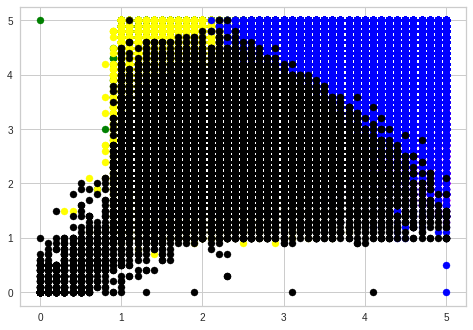

In [ ]:
plt.scatter(data["Extroversion_score"][kmean_labels== 0], data["Agreeability_score"][kmean_labels == 0], c="magenta", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 1], data["Agreeability_score"][kmean_labels== 1], c="green", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 2], data["Agreeability_score"][kmean_labels== 2], c="yellow", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 3], data["Agreeability_score"][kmean_labels== 3], c="blue", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 4], data["Agreeability_score"][kmean_labels== 4], c="black", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 5], data["Agreeability_score"][kmean_labels== 5], c="red", s=50)



plt.legend()
plt.show()

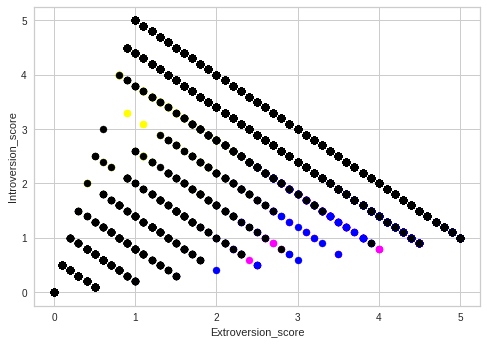

In [ ]:
plt.scatter(data["Extroversion_score"][kmean_labels== 0], data["Introversion_score"][kmean_labels == 0], c="magenta", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 1], data["Introversion_score"][kmean_labels== 1], c="green", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 2], data["Introversion_score"][kmean_labels== 2], c="yellow", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 3], data["Introversion_score"][kmean_labels== 3], c="blue", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 4], data["Introversion_score"][kmean_labels== 4], c="black", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 5], data["Introversion_score"][kmean_labels== 5], c="red", s=50)


plt.xlabel('Extroversion_score')
plt.ylabel('Introversion_score')


plt.legend()
plt.show()


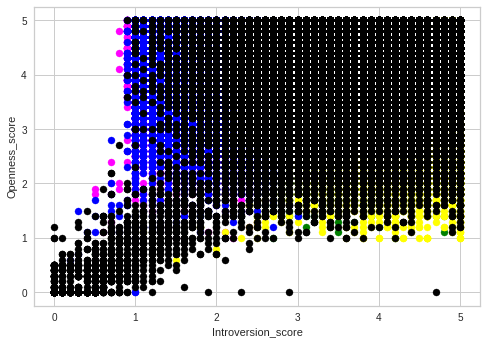

In [ ]:
plt.scatter(data["Introversion_score"][kmean_labels== 0], data["Openness_score"][kmean_labels == 0], c="magenta", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 1], data["Openness_score"][kmean_labels== 1], c="green", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 2], data["Openness_score"][kmean_labels== 2], c="yellow", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 3], data["Openness_score"][kmean_labels== 3], c="blue", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 4], data["Openness_score"][kmean_labels== 4], c="black", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 5], data["Openness_score"][kmean_labels== 5], c="red", s=50)


plt.xlabel('Introversion_score')
plt.ylabel('Openness_score')


plt.legend()
plt.show()


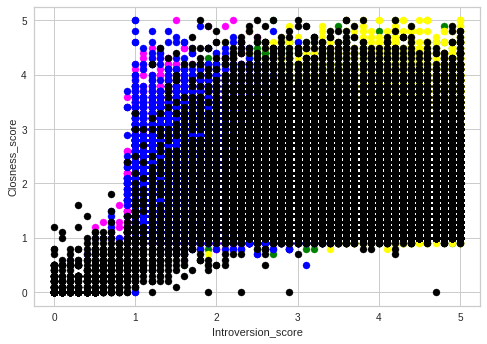

In [ ]:
plt.scatter(data["Introversion_score"][kmean_labels== 0], data["Closness_score"][kmean_labels == 0], c="magenta", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 1], data["Closness_score"][kmean_labels== 1], c="green", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 2], data["Closness_score"][kmean_labels== 2], c="yellow", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 3], data["Closness_score"][kmean_labels== 3], c="blue", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 4], data["Closness_score"][kmean_labels== 4], c="black", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 5], data["Closness_score"][kmean_labels== 5], c="red", s=50)


plt.xlabel('Introversion_score')
plt.ylabel('Closness_score')


plt.legend()
plt.show()


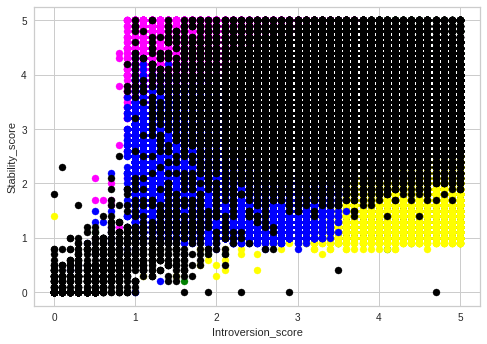

In [ ]:
plt.scatter(data["Introversion_score"][kmean_labels== 0], data["Stability_score"][kmean_labels == 0], c="magenta", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 1], data["Stability_score"][kmean_labels== 1], c="green", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 2], data["Stability_score"][kmean_labels== 2], c="yellow", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 3], data["Stability_score"][kmean_labels== 3], c="blue", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 4], data["Stability_score"][kmean_labels== 4], c="black", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 5], data["Stability_score"][kmean_labels== 5], c="red", s=50)


plt.xlabel('Introversion_score')
plt.ylabel('Stability_score')


plt.legend()
plt.show()


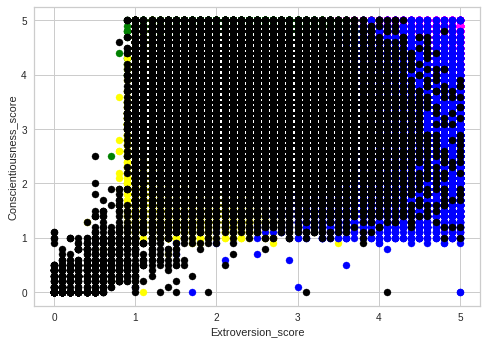

In [ ]:
plt.scatter(data["Extroversion_score"][kmean_labels== 0], data["Conscientiousness_score"][kmean_labels == 0], c="magenta", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 1], data["Conscientiousness_score"][kmean_labels== 1], c="green", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 2], data["Conscientiousness_score"][kmean_labels== 2], c="yellow", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 3], data["Conscientiousness_score"][kmean_labels== 3], c="blue", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 4], data["Conscientiousness_score"][kmean_labels== 4], c="black", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 5], data["Conscientiousness_score"][kmean_labels== 5], c="red", s=50)


plt.xlabel('Extroversion_score')
plt.ylabel('Conscientiousness_score')

plt.legend()
plt.show()

# Extroversion_score',
#  'Neurosis_score',
#  'Conscientiousness_score',
#  'Conscientiousness_score',
#  'Openness_score',
#  'Introversion_score',
#  'Stability_score',
#  'Hostility_score',
#  'Spontaneousness_score',
#  'Closness_score']

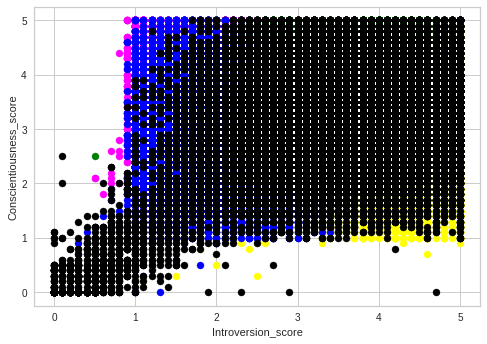

In [ ]:
plt.scatter(data["Introversion_score"][kmean_labels== 0], data["Conscientiousness_score"][kmean_labels == 0], c="magenta", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 1], data["Conscientiousness_score"][kmean_labels== 1], c="green", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 2], data["Conscientiousness_score"][kmean_labels== 2], c="yellow", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 3], data["Conscientiousness_score"][kmean_labels== 3], c="blue", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 4], data["Conscientiousness_score"][kmean_labels== 4], c="black", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 5], data["Conscientiousness_score"][kmean_labels== 5], c="red", s=50)


plt.xlabel('Introversion_score')
plt.ylabel('Conscientiousness_score')

plt.legend()
plt.show()

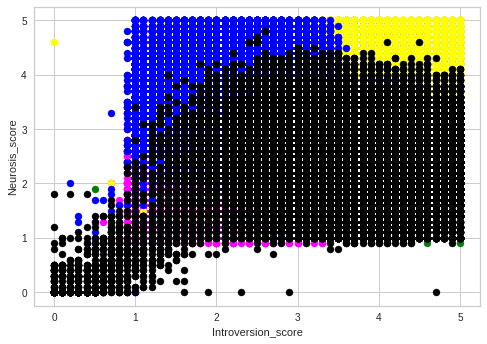

In [ ]:
plt.scatter(data["Introversion_score"][kmean_labels== 0], data["Neurosis_score"][kmean_labels == 0], c="magenta", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 1], data["Neurosis_score"][kmean_labels== 1], c="green", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 2], data["Neurosis_score"][kmean_labels== 2], c="yellow", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 3], data["Neurosis_score"][kmean_labels== 3], c="blue", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 4], data["Neurosis_score"][kmean_labels== 4], c="black", s=50)
plt.scatter(data["Introversion_score"][kmean_labels == 5], data["Neurosis_score"][kmean_labels== 5], c="red", s=50)


plt.xlabel('Introversion_score')
plt.ylabel('Neurosis_score')

plt.legend()
plt.show()

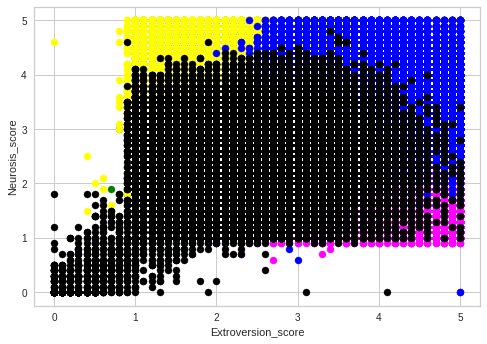

In [ ]:
plt.scatter(data["Extroversion_score"][kmean_labels== 0], data["Neurosis_score"][kmean_labels == 0], c="magenta", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 1], data["Neurosis_score"][kmean_labels== 1], c="green", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 2], data["Neurosis_score"][kmean_labels== 2], c="yellow", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 3], data["Neurosis_score"][kmean_labels== 3], c="blue", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 4], data["Neurosis_score"][kmean_labels== 4], c="black", s=50)
plt.scatter(data["Extroversion_score"][kmean_labels == 5], data["Neurosis_score"][kmean_labels== 5], c="red", s=50)


plt.xlabel('Extroversion_score')
plt.ylabel('Neurosis_score')

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
def metrics(data, labels):
    ss = silhouette_score(data, labels)
    chs = calinski_harabasz_score(data, labels)
    dbs = davies_bouldin_score(data, labels) #Compute the Davies-Bouldin score. 
#The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.
#Thus, clusters which are farther apart and less dispersed will result in a better score.
#The minimum score is zero, with lower values indicating better clustering.
    
    print(f"The Silhouette Score is: {ss}\nThe Calinski Harabasz Score is: {chs}\nThe Davies Bouldin Score is: {dbs}")
    
    return ss # chs, dbs

In [ ]:
metrics(data, kmean_labels)

KeyboardInterrupt: ignored

In [ ]:
# # Visualizing the means for each cluster
# dataclusters = df_parameters.groupby(data['Clusters'] ).mean()

# plt.figure(figsize=(22,3))
# for i in range(0, 5):
#     plt.subplot(1,5,i+1)
#     plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
#     plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
#     plt.title('Cluster ' + str(i))
#     plt.xticks(rotation=45)
#     plt.ylim(0,4);

In [ ]:
##PCA

# In order to visualize in 2D graph I will use PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(data)

data_pca = pd.DataFrame(data = pca_fit, columns=['PCA1', 'PCA2'])
data_pca['Clusters'] = kmean_labels
data_pca.head()

,PCA1,PCA2,Clusters
0,-8.348795,-2.445772,0
1,0.021987,4.761966,1
2,-1.224252,3.041901,1
3,1.820540,-0.404096,4
4,-4.288442,3.543724,0


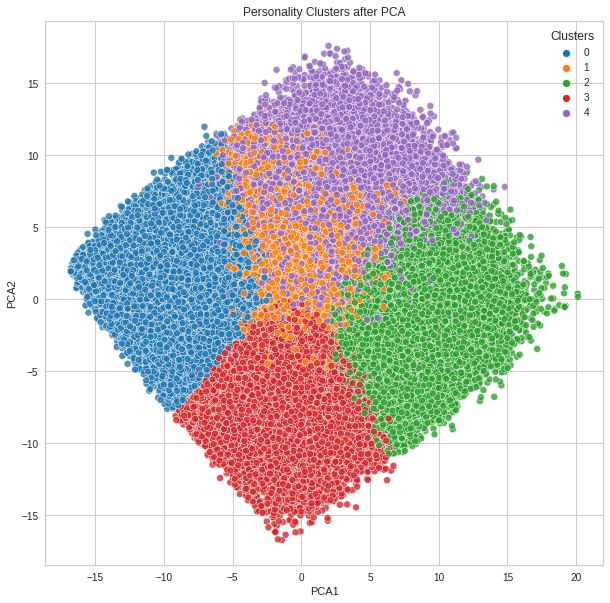

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data_pca, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [ ]:
# from sklearn.manifold import TSNE

# Xtsne = TSNE(n_components=2).fit_transform(data_pca)
# dftsne = pd.DataFrame(data=Xtsne , columns = ['x1','x2'])
# dftsne['cluster'] = kmean_labels
# dftsne.head()

In [ ]:
#I answered the questions and saved my score in an excel sheet to see in which cluster the model will predict it to be.

my_score = pd.read_excel("/content/gdrive/MyDrive/Colab datasets/My_answers.xlsx")
my_score

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,IPC
0,1.0,4.0,2.0,4.0,3.0,3.0,2.0,4.0,3.0,5.0,...,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,EG,0.0


In [ ]:
#Handling my reverse scoring for more accuracy.

my_score['EXT2'] = my_score['EXT2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['EXT4'] = my_score['EXT4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['EXT6'] = my_score['EXT6'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['EXT8'] = my_score['EXT8'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['EXT10'] = my_score['EXT10'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['EST2'] = my_score['EST2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['EST4'] = my_score['EST4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['AGR1'] = my_score['AGR1'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['AGR3'] = my_score['AGR3'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['AGR5'] = my_score['AGR5'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['AGR7'] = my_score['AGR7'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['CSN2'] = my_score['CSN2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['CSN4'] = my_score['CSN4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['CSN6'] = my_score['CSN6'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['CSN8'] = my_score['CSN8'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['OPN2'] = my_score['OPN2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['OPN4'] = my_score['OPN4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['OPN6'] = my_score['OPN6'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})

my_score.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,IPC
0,1.0,2,2.0,2,3.0,3,2.0,2,3.0,1,...,5.0,5,5.0,5,5.0,5.0,5.0,5.0,EG,0.0


In [ ]:
my_score['INT1'] = my_score['EXT1'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['INT2'] = my_score['EXT2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['INT3'] = my_score['EXT3'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['INT4'] = my_score['EXT4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['INT5'] = my_score['EXT5'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['INT6'] = my_score['EXT6'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['INT7'] = my_score['EXT7'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['INT8'] = my_score['EXT8'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['INT9'] = my_score['EXT9'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['INT10'] = my_score['EXT10'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})

my_score['STL1'] = my_score['EST1'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['STL2'] = my_score['EST2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['STL3'] = my_score['EST3'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['STL4'] = my_score['EST4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['STL5'] = my_score['EST5'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['STL6'] = my_score['EST6'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['STL7'] = my_score['EST7'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['STL8'] = my_score['EST8'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['STL9'] = my_score['EST9'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['STL10'] = my_score['EST10'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})

my_score['HST1'] = my_score['AGR1'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['HST2'] = my_score['AGR2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['HST3'] = my_score['AGR3'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['HST4'] = my_score['AGR4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['HST5'] = my_score['AGR5'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['HST6'] = my_score['AGR6'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['HST7'] = my_score['AGR7'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['HST8'] = my_score['AGR8'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['HST9'] = my_score['AGR9'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['HST10'] = my_score['AGR10'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})

my_score['SPN1'] = my_score['CSN1'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['SPN2'] = my_score['CSN2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['SPN3'] = my_score['CSN3'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['SPN4'] = my_score['CSN4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['SPN5'] = my_score['CSN5'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['SPN6'] = my_score['CSN6'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['SPN7'] = my_score['CSN7'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['SPN8'] = my_score['CSN8'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['SPN9'] = my_score['CSN9'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['SPN10'] = my_score['CSN10'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})

my_score['CLS1'] = my_score['OPN1'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['CLS2'] = my_score['OPN2'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['CLS3'] = my_score['OPN3'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['CLS4'] = my_score['OPN4'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['CLS5'] = my_score['OPN5'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['CLS6'] = my_score['OPN6'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['CLS7'] = my_score['OPN7'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['CLS8'] = my_score['OPN8'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['CLS9'] = my_score['OPN9'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})
my_score['CLS10'] = my_score['OPN10'].map({0: 0, 1:5, 2:4, 3:3, 4:2, 5:1})


my_score['Extroversion']= my_score[list(my_score.filter(regex='EXT'))].sum(axis=1)/10
my_score['Neurosis']= my_score[list(my_score.filter(regex='EST'))].sum(axis=1)/10
my_score['Agreeability']= my_score[list(my_score.filter(regex='AGR'))].sum(axis=1)/10
my_score['Conscientiousness']= my_score[list(my_score.filter(regex='CSN'))].sum(axis=1)/10
my_score['Openness']= my_score[list(my_score.filter(regex='OPN'))].sum(axis=1)/10
my_score['Introversion']= my_score[list(my_score.filter(regex='INT'))].sum(axis=1)/10
my_score['Stability']= my_score[list(my_score.filter(regex='STL'))].sum(axis=1)/10
my_score['Hostility']= my_score[list(my_score.filter(regex='HST'))].sum(axis=1)/10
my_score['Spontaneousness']= my_score[list(my_score.filter(regex='SPN'))].sum(axis=1)/10
my_score['Closness']= my_score[list(my_score.filter(regex='CLS'))].sum(axis=1)/10

my_score.drop(['country'], axis= 1, inplace=True)
my_score.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,Extroversion,Neurosis,Agreeability,Conscientiousness,Openness,Introversion,Stability,Hostility,Spontaneousness,Closness
0,1.0,2,2.0,2,3.0,3,2.0,2,3.0,1,...,2.1,3.8,2.7,3.0,5.0,3.9,2.2,3.3,3.0,1.0


In [ ]:
my_personality = kmean_model.predict(my_score)
print('My Personality Traits Cluster: ', my_personality)


My Personality Traits Cluster:  [2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Agreeability
- Closness
- Conscientiousness
- Extroversion
- Hostility
- ...
Feature names seen at fit time, yet now missing:
- Agreeability_score
- Closness_score
- Conscientiousness_score
- Extroversion_score
- Hostility_score
- ...

  warnings.warn(message, FutureWarning)


In [ ]:
my_total_scores= my_score[['Extroversion', 'Neurosis', 'Agreeability', 'Conscientiousness','Openness', 'Introversion', 'Stability', 'Hostility', 'Spontaneousness', 'Closness']]
my_total_scores['cluster'] = my_personality
my_total_scores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Extroversion,Neurosis,Agreeability,Conscientiousness,Openness,Introversion,Stability,Hostility,Spontaneousness,Closness,cluster
0,2.1,3.8,2.7,3.0,5.0,3.9,2.2,3.3,3.0,1.0,2


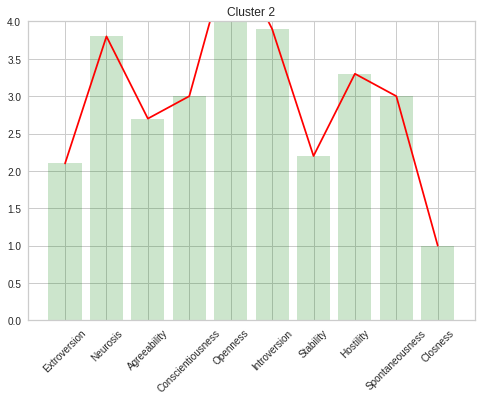

In [ ]:
my_total_scores = my_total_scores.drop('cluster', axis=1)
plt.bar(my_total_scores.columns, my_total_scores.iloc[0,:], color='green', alpha=0.2)
plt.plot(my_total_scores.columns, my_total_scores.iloc[0,:], color='red')
plt.title('Cluster 2')
plt.xticks(rotation=45)
plt.ylim(0,4);